<a href="https://www.kaggle.com/code/sayedshaun/titanic-survive-prediction?scriptVersionId=138640738" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
def delete_object(data):
    for i in data.columns:
        missing_percentage = data[i].isnull().sum() / len(data) * 100
        if missing_percentage > 50:
            data.drop([i], axis = 1, inplace = True)

    return data

delete_object(df)

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

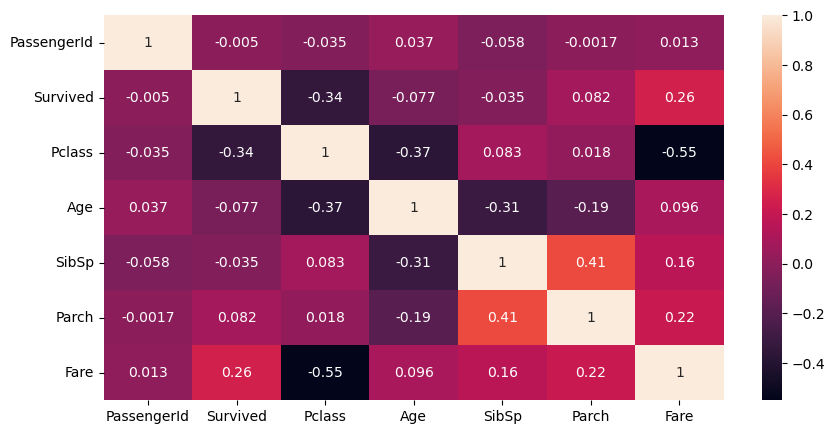

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [10, 5])
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def label_encoder(data):
    for i in data.columns:
        if data[i].dtype == "object":
            data[i] = le.fit_transform(data[i])
            
label_encoder(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,0


In [8]:
#Handle missing values

def handle_missing(data):
    for i in data.columns:
        if data[i].isnull().any():
            data[i].fillna(np.mean(df[i]), inplace = True)
            
handle_missing(df)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
#Scaling function
from sklearn.preprocessing import MinMaxScaler
def scaling_function(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    return scaled_data

In [10]:
#Split our target column
y = df["Survived"]
#Remove the unnecessary column 
x = df.drop(["Name", "Survived"], axis = 1)
scaled_x = scaling_function(x)

Using Tensorflow.Keras

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(units = 128, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 64, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 32, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.BinaryCrossentropy(), metrics = "accuracy")
model.fit(scaled_x, y, validation_data = (scaled_x, y), epochs = 100, batch_size = 32)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/100
28/28 [==============================] - 1s 12ms/step - loss: 1.2242 - accuracy: 0.5746 - val_loss: 1.0993 - val_accuracy: 0.6981
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 1.0203 - accuracy: 0.6947 - val_loss: 0.9399 - val_accuracy: 0.7026
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.8832 - accuracy: 0.7576 - val_loss: 0.8245 - val_accuracy: 0.7811
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7848 - accuracy: 0.7823 - val_loss: 0.7436 - val_accuracy: 0.7677
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.7156 - accuracy: 0.7710 - val_loss: 0.6855 - val_accuracy: 0.7823
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.7856 - val_loss: 0.6447 - val_accuracy: 0.7856
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.7834 - val_loss: 0.6151 - val_accuracy: 0.7845
Epoch 8/100


In [12]:
loss, accuracy = model.evaluate(scaled_x, y)

print("Loss:", loss)
print("Accuracy:", accuracy)

28/28 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.8092
Loss: 0.4601587653160095
Accuracy: 0.8092031478881836


In [13]:
#Prepare the test to predict y if your score is good
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

x_test = delete_object(test_df)
x_test = label_encoder(test_df)
x_test = handle_missing(test_df)

scaled_x_test = scaling_function(test_df)
